<a href="https://colab.research.google.com/github/Vincenzo-Miracula/TallerPratico/blob/main/PandasEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
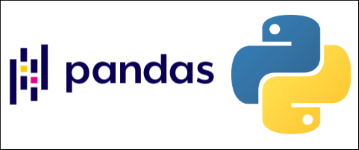
---
### Creación de un DataFrame
---
* Pandas es una poderosa libreria de Python utilizada para la manipulación y análisis de datos.
* Ofrece estructuras de datos flexibles como DataFrame, que permiten organizar y procesar datos tabulares de manera eficiente.
* Pandas se utiliza ampliamente en el campo del análisis de datos, permitiendo operaciones como filtrado, agregación y transformación de datos de manera intuitiva.
---

[Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [2]:
import pandas as pd

In [71]:
data={"name":["Bill","Tom","Tim","John","Alex","Vanessa","Kate"],
      "score":[90,80,85,75,95,60,65],
      "sport":["Wrestling","Football","Skiing","Swimming","Tennis",
               "Karete","Surfing"],
      "sex":["M","M","M","M","F","F","F"]}

In [ ]:
pd.read_csv()

In [ ]:
df=pd.DataFrame(data)
df

In [ ]:
# cambiar orden de columnas
df= df[["name","sport","sex","score"]]
df

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
# veamos los datos que faltan en las columnas.
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.value_counts()

In [ ]:
df['']

In [ ]:
df.drop_duplicates()

In [ ]:
df.dropna()

In [ ]:
df.fillna(0,inplace=True)
#df.fillna(value=df.mean())
df

In [ ]:
df.fillna(method='ffill', inplace=True)
#ffill = forward fill - relleno delantero
#para ir a la inversa, también hay un método bfill (backward fill)

In [ ]:
df.rename(columns={}, inplace=True)

In [ ]:
grouped_df = df.groupby([''])

# EDA dos líneas

### sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
mport sweetviz

In [ ]:
report_analyze = sweetviz.analyze([df,])

In [ ]:
report_analyze.show_html("Report.html")

### ydata-profiling

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile.to_file("your_report.html")

# funciones

In [ ]:
def limpiar(texto):
    # Eliminar todas las etiquetas HTML y su contenido del texto
    texto = re.sub(r'<[^>]+>', '', texto)
    # Eliminar emojis del texto
    patron_emoji = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    texto = patron_emoji.sub(r'', texto)
    # Eliminar todos los enlaces que comienzan con "http" o "www"
    texto = re.sub(r'(https?://\S+|www\.\S+)', '', texto)
    # Eliminar las menciones de usuarios
    texto = re.sub(r'@\w+\s*', '', texto)
    # Reemplazar todos los caracteres que no son letras, espacios o comillas simples con un espacio en blanco
    texto = re.sub(r'[^A-Za-zÀ-ÿ\s\']+', ' ', texto)
    # Eliminar la secuencia ">"
    texto = texto.replace("&gt;", '')
    # Eliminar la sigla "RT"
    texto = re.sub(r'RT', '', texto)
    # Eliminar los caracteres de nueva línea
    texto = texto.replace("\n", '')
    # Eliminar los hashtags del texto
    texto = re.sub(r'#[^\s]+', '', texto)
    # Eliminar todos los caracteres que no son palabras
    texto = re.sub(r'[^\w\sàèéìòù]+', '', texto)
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Eliminar caracteres especiales específicos del texto
    texto = ''.join(caracter for caracter in texto if caracter not in '#$&?\*+-/;<=>@[\\]^_`{|}~')
    return texto

In [ ]:
df[''].apply(limpiar)